In [2]:
import requests
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [34]:
with open("arxiv-metadata-oai-snapshot.json") as f:
    # Split the file into separate JSON objects
    raw_data = f.read().split('\n')
    
    # Convert each JSON object to a Python dictionary
    data = []
    for item in raw_data:
        if item:
            data.append(json.loads(item))
    
    # Convert the data to a Pandas DataFrame
    df_raw = pd.DataFrame(data)
    
df_raw.to_csv("raw_arxiv.csv", sep='\t', index=False)
df_raw.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [5]:
df_raw.describe()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
count,2.250223e+06,2235034,2250223,2250223,1723719,800513,1115915,175145,2250223,1797376,2250223,2250223,2250223,2250223
unique,2.250223e+06,461614,1734856,2246338,1062265,792554,1113878,170429,76641,9,2248509,2241056,4792,1660580
top,7.040001e+02,EPTCS,CMS Collaboration,Discussion of: A statistical analysis of multi...,10 pages,"Dans Design, Automation and Test in Europe - D...",10.1145/1122445.1122456,CPH-SYM-DNRF92,astro-ph,http://arxiv.org/licenses/nonexclusive-distrib...,This paper has been withdrawn.\n,"[{'version': 'v1', 'created': 'Wed, 27 Jun 201...",2007-05-23,"[['CMS Collaboration', '', '']]"
freq,1.000000e+00,3463,1170,12,7539,128,17,341,86911,1512669,91,103,130166,1170


In [398]:
import requests
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_colwidth', None)

df_new_csv = pd.read_csv("raw_arxiv.csv", sep = '\t', index_col=False)
df_new_csv = df_new_csv[['id', 'title', 'comments', 'journal-ref', 'categories', 'versions']]

C:\Users\lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [399]:
df_new_csv.shape[0]

2250223

In [400]:
df_new_csv.describe()

,id,title,comments,journal-ref,categories,versions
count,2.250223e+06,2250223,1723719,800513,2250223,2250223
unique,2.250223e+06,2246338,1062265,792554,76641,2241056
top,7.040001e+02,Discussion of: A statistical analysis of multiple temperature proxies:\n Are reconstructions of surface temperatures over the last 1000 years\n reliable?,10 pages,"Dans Design, Automation and Test in Europe - DATE'05, Munich :\n Allemagne (2005)",astro-ph,"[{'version': 'v1', 'created': 'Wed, 27 Jun 2012 19:59:59 GMT'}]"
freq,1.000000e+00,12,7539,128,86911,103


In [401]:
# df_new_csv = df_new_csv[~df_new_csv["title"].str.lower().str.contains("covid")]
df_new_csv = (df_new_csv[~(df_new_csv['title']
                           .str.lower()
                           .str.contains('covid|covid-19|coronavirus') | df_new_csv['comments']
                           .str.lower()
                           .str.contains('covid|covid-19|coronavirus'))])
df_new_csv.shape[0]

2245722

In [402]:
df_new_csv.isna().sum()

id                   0
title                0
comments        524580
journal-ref    1445882
categories           0
versions             0
dtype: int64

In [403]:
#Journal ref cannot be null if we are looking for a relationship between journal ref and categories
df_new_csv = df_new_csv[df_new_csv['journal-ref'].notnull()]
df_new_csv = df_new_csv[df_new_csv['comments'].notnull()].reset_index(drop=True)
df_new_csv.isna().sum()

id             0
title          0
comments       0
journal-ref    0
categories     0
versions       0
dtype: int64

In [404]:
display(df_new_csv.count())
print('------------------------------------------------------------------------------')
display(df_new_csv.info())
print('------------------------------------------------------------------------------')
display(df_new_csv.describe())

id             679788
title          679788
comments       679788
journal-ref    679788
categories     679788
versions       679788
dtype: int64

------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679788 entries, 0 to 679787
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           679788 non-null  object
 1   title        679788 non-null  object
 2   comments     679788 non-null  object
 3   journal-ref  679788 non-null  object
 4   categories   679788 non-null  object
 5   versions     679788 non-null  object
dtypes: object(6)
memory usage: 31.1+ MB


None

------------------------------------------------------------------------------


,id,title,comments,journal-ref,categories,versions
count,679788.0000,679788,679788,679788,679788,679788
unique,679788.0000,679058,443094,675230,31957,679041
top,704.0001,Discussion of: A statistical analysis of multiple temperature proxies:\n Are reconstructions of surface temperatures over the last 1000 years\n reliable?,"5 pages, 4 figures","Dans Design, Automation and Test in Europe - DATE'05, Munich :\n Allemagne (2005)",hep-ph,"[{'version': 'v1', 'created': 'Wed, 1 Apr 1992 00:00:00 GMT'}]"
freq,1.0000,12,3684,127,45542,16


In [405]:
#Drops any duplicated titles
duplicated_data = df_new_csv[df_new_csv.duplicated(subset = ['title'], keep = False)]
df_new_csv.drop(duplicated_data.index, inplace = True)

#Drops any duplicated id
duplicated_data = df_new_csv[df_new_csv.duplicated(subset = ['id'], keep = False)]
df_new_csv.drop(duplicated_data.index, inplace = True)

#Drops any duplicated journal-ref
duplicated_data = df_new_csv[df_new_csv.duplicated(subset = ['journal-ref'], keep = False)]
df_new_csv.drop(duplicated_data.index, inplace = True)

In [406]:
df_new_csv.describe()

,id,title,comments,journal-ref,categories,versions
count,671459.0000,671459,671459,671459,671459,671459
unique,671459.0000,671459,438024,671459,31566,670723
top,704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"5 pages, 4 figures","Phys.Rev.D76:013009,2007",hep-ph,"[{'version': 'v1', 'created': 'Wed, 1 Apr 1992 00:00:00 GMT'}]"
freq,1.0000,1,3663,1,45157,16


In [407]:
df_new_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671459 entries, 0 to 679787
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           671459 non-null  object
 1   title        671459 non-null  object
 2   comments     671459 non-null  object
 3   journal-ref  671459 non-null  object
 4   categories   671459 non-null  object
 5   versions     671459 non-null  object
dtypes: object(6)
memory usage: 35.9+ MB


In [408]:
df_new_csv.head(3)

,id,title,comments,journal-ref,categories,versions
0,704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007 19:18:42 GMT'}, {'version': 'v2', 'created': 'Tue, 24 Jul 2007 20:10:27 GMT'}]"
1,704.0007,Polymer Quantum Mechanics and its Continuum Limit,"16 pages, no figures. Typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,"[{'version': 'v1', 'created': 'Sat, 31 Mar 2007 04:27:22 GMT'}, {'version': 'v2', 'created': 'Wed, 22 Aug 2007 22:42:11 GMT'}]"
2,704.0008,Numerical solution of shock and ramp compression for general material\n properties,Minor corrections,"Journal of Applied Physics, vol 104, 073536 (2008)",cond-mat.mtrl-sci,"[{'version': 'v1', 'created': 'Sat, 31 Mar 2007 04:47:20 GMT'}, {'version': 'v2', 'created': 'Thu, 10 Apr 2008 08:42:28 GMT'}, {'version': 'v3', 'created': 'Tue, 1 Jul 2008 18:54:28 GMT'}]"


In [409]:
# Function to remove special characters
def remove_special_characters(text):
    # Remove special characters outside of punctuation
    text = re.sub(r"[^\w\s,.?!\\]", "", text)
    return text

# Convert 'title' and 'comments' columns to lowercase
df_new_csv['title'] = df_new_csv['title'].str.lower()
df_new_csv['comments'] = df_new_csv['comments'].str.lower()

#Cleaning any inconsistencies within journal-ref
df_new_csv['journal-ref'] = df_new_csv['journal-ref'].str.replace('--', '-')
df_new_csv['journal-ref'] = df_new_csv['journal-ref'].str.replace(' -- ', '-')
df_new_csv['journal-ref'] = df_new_csv['journal-ref'].str.replace(' - ', '-')

# Remove special characters outside of punctuation
df_new_csv['title'] = df_new_csv['title'].str.replace('\n', ' ')
df_new_csv['title'] = df_new_csv['title'].apply(remove_special_characters)
df_new_csv['comments'] = df_new_csv['comments'].apply(remove_special_characters)

duplicated_data = df_new_csv[df_new_csv.duplicated(subset = ['journal-ref'], keep = False)]
df_new_csv.drop(duplicated_data.index, inplace = True)

In [410]:
import ast

def extract_v1_year(versions):
    dict_list = ast.literal_eval(versions)
    for item in dict_list:
        if item['version'] == 'v1':
            return item['created'].split()[-3]

# Apply the function to the 'versions' column and create a new 'year' column
df_new_csv['year'] = df_new_csv['versions'].apply(extract_v1_year)
df_new_csv = df_new_csv.drop('versions', axis=1)
display(df_new_csv)

,id,title,comments,journal-ref,categories,year
0,704.0001,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"37 pages, 15 figures published version","Phys.Rev.D76:013009,2007",hep-ph,2007
1,704.0007,polymer quantum mechanics and its continuum limit,"16 pages, no figures. typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,2007
2,704.0008,numerical solution of shock and ramp compression for general material properties,minor corrections,"Journal of Applied Physics, vol 104, 073536 (2008)",cond-mat.mtrl-sci,2007
3,704.0015,fermionic superstring loop amplitudes in the pure spinor formalism,"22 pages signs and coefficients adjusted for anticommuting\n superfields, section 4.3 changed accordingly, reference added","JHEP 0705:034,2007",hep-th,2007
4,704.0016,lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2007
...,...,...,...,...,...,...
679783,supr-con/9608001,topology and phase transitions in the littleparks experiment,"latex, 26 pages, 5 figs upon request",SIAM J Appl Math {\bf 58} (1998) 103-121,supr-con cond-mat.supr-con quant-ph,1996
679784,supr-con/9608003,extended bound states and resonances of two fermions on a periodic lattice,"21 pages, revtex, 4 postscript figures, arithmetic errors corrected.\n an abbreviated version no appendix appeared in prb on march 1, 1997","Phys. Rev. B 55, 6035 (1997)",supr-con cond-mat.supr-con,1996
679785,supr-con/9608004,ginzburglandaugorkov theory of magnetic oscillations in a typeii 2dimensional superconductor,"39 pages, 8 figures. this is a replacement of suprcon9608004.\n several sections changed or added, including a section on the effect of spin\n and the effect of a conserved number of particles. to be published in phys.\n rev. b",PHYS REV B 56: (2) 809-825 JUL 1 1997,supr-con cond-mat.supr-con,1996
679786,supr-con/9608005,evidence for quasiparticle decay in photoemission from underdoped cuprates,"4 pages of revtex, 3 eps figures","Phys. Rev. Lett. 79, 1726 (1997)",supr-con cond-mat.supr-con,1996


In [411]:
# Function to extract the year using the pattern
def extract_year_from_journal(journal_ref):
    pattern = r"\((20|19)\d{2}\)|(?<=\s|,)\b(20|19)\d{2}\b(?!\d*-\d*)"
    match = re.search(pattern, journal_ref)
    if match:
        year = match.group(0)
        year = year.strip("()")  # Remove parentheses from the extracted year
        if 1908<=int(year) <= 2023:
            return int(year)


# Apply the extract_year function to the 'journal-ref' column and create the 'year' column
df_new_csv['year_from_journal'] = df_new_csv['journal-ref'].apply(extract_year_from_journal)
display(df_new_csv[['journal-ref', 'year_from_journal']])


,journal-ref,year_from_journal
0,"Phys.Rev.D76:013009,2007",2007.0
1,"Phys.Rev.D76:044016,2007",2007.0
2,"Journal of Applied Physics, vol 104, 073536 (2008)",2008.0
3,"JHEP 0705:034,2007",2007.0
4,"Commun.Theor.Phys.49:993-1000,2008",2008.0
...,...,...
679783,SIAM J Appl Math {\bf 58} (1998) 103-121,1998.0
679784,"Phys. Rev. B 55, 6035 (1997)",1997.0
679785,PHYS REV B 56: (2) 809-825 JUL 1 1997,1997.0
679786,"Phys. Rev. Lett. 79, 1726 (1997)",1997.0


In [412]:
def extract_year_from_parentheses(journal_ref):
    match = re.search(r"\((20|19)\d{2}\)", journal_ref)
    if match:
        return match.group(0)[1:-1]  # Extract the year from parentheses from journal-ref
                                     #This looks to be the most accurate year for those with the year inside of parentheses

df_new_csv['year_extracted'] = df_new_csv.apply(lambda row: extract_year_from_parentheses(row['journal-ref'])
                                               if extract_year_from_parentheses(row['journal-ref']) is not None
                                               else (str(int(row['year']) + 1)
                                                     if str(int(row['year']) + 1) in row['journal-ref']
                                                     else (str(int(row['year']) - 1)
                                                           if str(int(row['year']) - 1) in row['journal-ref']
                                                           else str(row['year_from_journal']))),
                                               axis=1)
df_new_csv.dropna(inplace=True)
df_new_csv.drop(columns = ['year', 'year_from_journal'], inplace = True)
df_new_csv['year_extracted'] = df_new_csv['year_extracted'].astype(float)
df_new_csv['year_extracted'] = df_new_csv['year_extracted'].round().astype(int)
df_new_csv = df_new_csv[df_new_csv['year_extracted'] <= 2023]

In [413]:
# Extract the integer before ' pages' using regular expressions and create a new column 'no_pages'
df_new_csv['no_pages'] = df_new_csv['comments'].str.extract(r'(\d+)\s+pages', flags=re.IGNORECASE, expand=False)

# Convert the 'no_pages' column to numeric type
df_new_csv['no_pages'] = pd.to_numeric(df_new_csv['no_pages'], errors='coerce')

#Drop where no_pages could not be found
df_new_csv = df_new_csv[df_new_csv['no_pages'].notnull()].reset_index(drop=True)
df_new_csv = df_new_csv[df_new_csv['no_pages'] != 0]

# Split the 'title' column by whitespace and count the number of resulting words
df_new_csv['no_words_in_title'] = df_new_csv['title'].str.split().apply(len)

display(df_new_csv)

,id,title,comments,journal-ref,categories,year_extracted,no_pages,no_words_in_title
0,704.0001,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"37 pages, 15 figures published version","Phys.Rev.D76:013009,2007",hep-ph,2007,37.0,12
1,704.0007,polymer quantum mechanics and its continuum limit,"16 pages, no figures. typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,2007,16.0,7
2,704.0015,fermionic superstring loop amplitudes in the pure spinor formalism,"22 pages signs and coefficients adjusted for anticommuting\n superfields, section 4.3 changed accordingly, reference added","JHEP 0705:034,2007",hep-th,2007,22.0,9
3,704.0016,lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2008,17.0,5
4,704.0017,spectroscopic observations of the intermediate polar ex hydrae in quiescence,"10 pages, 11 figures figures 3, 4, 7 and 8 at reduced resolution,\n originals available on request. accepted for publication in monthly notices\n of the royal astronomical society","Mon.Not.Roy.Astron.Soc.378:211-220,2007",astro-ph,2007,10.0,10
...,...,...,...,...,...,...,...,...
548409,supr-con/9608001,topology and phase transitions in the littleparks experiment,"latex, 26 pages, 5 figs upon request",SIAM J Appl Math {\bf 58} (1998) 103-121,supr-con cond-mat.supr-con quant-ph,1998,26.0,8
548410,supr-con/9608003,extended bound states and resonances of two fermions on a periodic lattice,"21 pages, revtex, 4 postscript figures, arithmetic errors corrected.\n an abbreviated version no appendix appeared in prb on march 1, 1997","Phys. Rev. B 55, 6035 (1997)",supr-con cond-mat.supr-con,1997,21.0,12
548411,supr-con/9608004,ginzburglandaugorkov theory of magnetic oscillations in a typeii 2dimensional superconductor,"39 pages, 8 figures. this is a replacement of suprcon9608004.\n several sections changed or added, including a section on the effect of spin\n and the effect of a conserved number of particles. to be published in phys.\n rev. b",PHYS REV B 56: (2) 809-825 JUL 1 1997,supr-con cond-mat.supr-con,1997,39.0,10
548412,supr-con/9608005,evidence for quasiparticle decay in photoemission from underdoped cuprates,"4 pages of revtex, 3 eps figures","Phys. Rev. Lett. 79, 1726 (1997)",supr-con cond-mat.supr-con,1997,4.0,9


In [414]:
df_new_csv.isna().sum()

id                   0
title                0
comments             0
journal-ref          0
categories           0
year_extracted       0
no_pages             0
no_words_in_title    0
dtype: int64

In [415]:
df_new_csv

,id,title,comments,journal-ref,categories,year_extracted,no_pages,no_words_in_title
0,704.0001,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"37 pages, 15 figures published version","Phys.Rev.D76:013009,2007",hep-ph,2007,37.0,12
1,704.0007,polymer quantum mechanics and its continuum limit,"16 pages, no figures. typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,2007,16.0,7
2,704.0015,fermionic superstring loop amplitudes in the pure spinor formalism,"22 pages signs and coefficients adjusted for anticommuting\n superfields, section 4.3 changed accordingly, reference added","JHEP 0705:034,2007",hep-th,2007,22.0,9
3,704.0016,lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2008,17.0,5
4,704.0017,spectroscopic observations of the intermediate polar ex hydrae in quiescence,"10 pages, 11 figures figures 3, 4, 7 and 8 at reduced resolution,\n originals available on request. accepted for publication in monthly notices\n of the royal astronomical society","Mon.Not.Roy.Astron.Soc.378:211-220,2007",astro-ph,2007,10.0,10
...,...,...,...,...,...,...,...,...
548409,supr-con/9608001,topology and phase transitions in the littleparks experiment,"latex, 26 pages, 5 figs upon request",SIAM J Appl Math {\bf 58} (1998) 103-121,supr-con cond-mat.supr-con quant-ph,1998,26.0,8
548410,supr-con/9608003,extended bound states and resonances of two fermions on a periodic lattice,"21 pages, revtex, 4 postscript figures, arithmetic errors corrected.\n an abbreviated version no appendix appeared in prb on march 1, 1997","Phys. Rev. B 55, 6035 (1997)",supr-con cond-mat.supr-con,1997,21.0,12
548411,supr-con/9608004,ginzburglandaugorkov theory of magnetic oscillations in a typeii 2dimensional superconductor,"39 pages, 8 figures. this is a replacement of suprcon9608004.\n several sections changed or added, including a section on the effect of spin\n and the effect of a conserved number of particles. to be published in phys.\n rev. b",PHYS REV B 56: (2) 809-825 JUL 1 1997,supr-con cond-mat.supr-con,1997,39.0,10
548412,supr-con/9608005,evidence for quasiparticle decay in photoemission from underdoped cuprates,"4 pages of revtex, 3 eps figures","Phys. Rev. Lett. 79, 1726 (1997)",supr-con cond-mat.supr-con,1997,4.0,9


In [416]:
df_new_csv.to_csv("ada.csv", sep='\t', index=False)

In [102]:
import requests
import pandas as pd
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from fuzzywuzzy import fuzz

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv("ada.csv", sep = '\t', index_col=False)
df = df.astype('string')
df['year_extracted'] = df['year_extracted'].astype(float)
df['year_extracted'] = df['year_extracted'].round().astype(int)

df['no_words_in_title'] = df['no_words_in_title'].astype(float)
df['no_words_in_title'] = df['no_words_in_title'].round().astype(int)

df['no_pages'] = df['no_pages'].astype(float)
df['no_pages'] = df['no_pages'].round().astype(int)
display(df.describe())
print("------------------------------------------------------------------------------------------")
display(df.info())

C:\Users\lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year_extracted,no_pages,no_words_in_title
count,548401.00,548401.00,548401.00
mean,2010.66,29.46,9.72
std,7.69,4304.81,3.69
min,1908.00,1.00,1.00
25%,2005.00,8.00,7.00
50%,2011.00,13.00,9.00
75%,2017.00,21.00,12.00
max,2023.00,3110318.00,61.00


------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548401 entries, 0 to 548400
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 548401 non-null  string
 1   title              548401 non-null  string
 2   comments           548401 non-null  string
 3   journal-ref        548401 non-null  string
 4   categories         548401 non-null  string
 5   year_extracted     548401 non-null  int32 
 6   no_pages           548401 non-null  int32 
 7   no_words_in_title  548401 non-null  int32 
dtypes: int32(3), string(5)
memory usage: 27.2 MB


None

In [103]:
encoded_df = df['categories'].str.get_dummies(sep=' ')

# Concatenate the encoded_df with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

df_encoded['no_of_cats'] = df_encoded.iloc[:, 8:].sum(axis=1)

df_encoded.head(5)

,id,title,comments,journal-ref,categories,year_extracted,no_pages,no_words_in_title,acc-phys,adap-org,...,quant-ph,solv-int,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH,supr-con,no_of_cats
0,704.0001,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"37 pages, 15 figures published version","Phys.Rev.D76:013009,2007",hep-ph,2007,37,12,0,0,...,0,0,0,0,0,0,0,0,0,1
1,704.0007,polymer quantum mechanics and its continuum limit,"16 pages, no figures. typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,2007,16,7,0,0,...,0,0,0,0,0,0,0,0,0,1
2,704.0015,fermionic superstring loop amplitudes in the pure spinor formalism,"22 pages signs and coefficients adjusted for anticommuting superfields, section 4.3 changed accordingly, reference added","JHEP 0705:034,2007",hep-th,2007,22,9,0,0,...,0,0,0,0,0,0,0,0,0,1
3,704.0016,lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2008,17,5,0,0,...,0,0,0,0,0,0,0,0,0,1
4,704.0017,spectroscopic observations of the intermediate polar ex hydrae in quiescence,"10 pages, 11 figures figures 3, 4, 7 and 8 at reduced resolution, originals available on request. accepted for publication in monthly notices of the royal astronomical society","Mon.Not.Roy.Astron.Soc.378:211-220,2007",astro-ph,2007,10,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
df_viz = df_encoded[['id', 'title', 'comments', 'journal-ref', 'categories', 'year_extracted', 'no_pages', 'no_words_in_title', 'no_of_cats']]
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548401 entries, 0 to 548400
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 548401 non-null  string
 1   title              548401 non-null  string
 2   comments           548401 non-null  string
 3   journal-ref        548401 non-null  string
 4   categories         548401 non-null  string
 5   year_extracted     548401 non-null  int32 
 6   no_pages           548401 non-null  int32 
 7   no_words_in_title  548401 non-null  int32 
 8   no_of_cats         548401 non-null  int64 
dtypes: int32(3), int64(1), string(5)
memory usage: 31.4 MB


In [105]:
df_viz.describe()

,year_extracted,no_pages,no_words_in_title,no_of_cats
count,548401.00,548401.00,548401.00,548401.00
mean,2010.66,29.46,9.72,1.69
std,7.69,4304.81,3.69,0.94
min,1908.00,1.00,1.00,1.00
25%,2005.00,8.00,7.00,1.00
50%,2011.00,13.00,9.00,1.00
75%,2017.00,21.00,12.00,2.00
max,2023.00,3110318.00,61.00,11.00


array([[<AxesSubplot:title={'center':'year_extracted'}>,
        <AxesSubplot:title={'center':'no_pages'}>],
       [<AxesSubplot:title={'center':'no_words_in_title'}>,
        <AxesSubplot:title={'center':'no_of_cats'}>]], dtype=object)

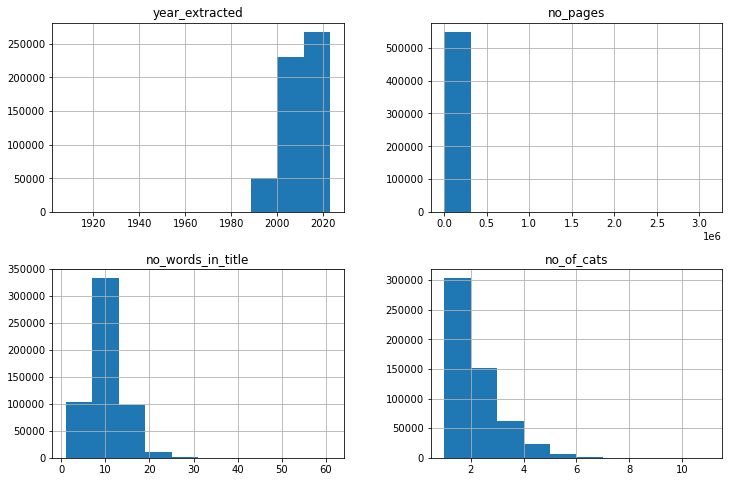

In [106]:
df_viz.hist(figsize=(12, 8))

In [107]:
from scipy.stats import skew

df_trimmed = df_encoded.copy()

columns_to_trim = ['year_extracted', 'no_pages', 'no_words_in_title', 'no_of_cats']

for column in columns_to_trim:
    values = df_trimmed[column]
    skewness = skew(values)
    
    if skewness > 0:
        # If the Data is skewed right, trim the top 5%
        trim_threshold = np.percentile(values, 95)
        df_trimmed = df_trimmed[df_trimmed[column] <= trim_threshold]
        print('Trimming Values in', column, 'greater than', trim_threshold)
    elif skewness < 0:
        # If the Data is skewed left, trim the bottom 5%
        trim_threshold = np.percentile(values, 5)
        df_trimmed = df_trimmed[df_trimmed[column] >= trim_threshold]
        print('Trimming Values in', column, 'less than', trim_threshold)

Trimming Values in year_extracted less than 1997.0
Trimming Values in no_pages greater than 43.0
Trimming Values in no_words_in_title greater than 16.0
Trimming Values in no_of_cats greater than 4.0


array([[<AxesSubplot:title={'center':'year_extracted'}>,
        <AxesSubplot:title={'center':'no_pages'}>],
       [<AxesSubplot:title={'center':'no_words_in_title'}>,
        <AxesSubplot:title={'center':'no_of_cats'}>]], dtype=object)

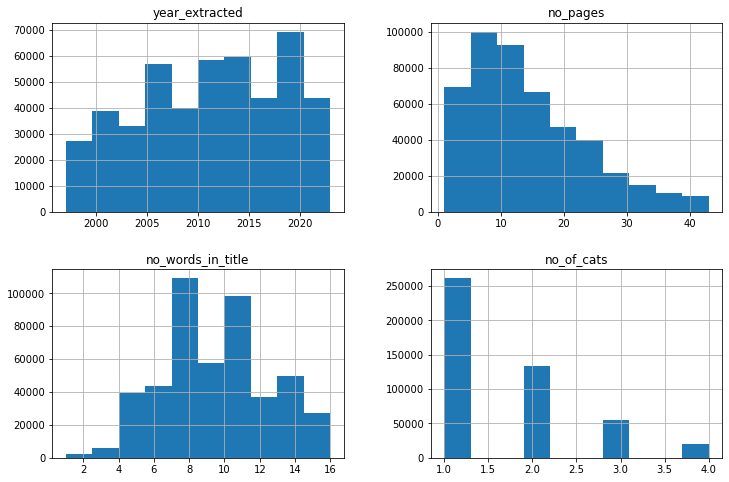

In [108]:
# Before trimming 548401 rows × 185 columns
# After trimming 470546 rows × 185 columns

df_trimmed[['year_extracted', 'no_pages', 'no_words_in_title', 'no_of_cats']].hist(figsize=(12, 8))

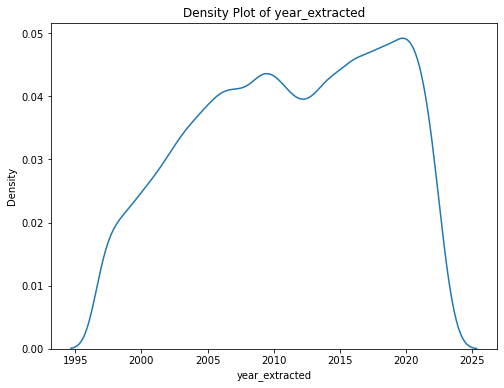

In [109]:
column_to_plot = 'year_extracted'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create density plot for the column
sns.kdeplot(data=df_trimmed, x=column_to_plot, bw_adjust = 1.5)

# Set labels and title
ax.set_xlabel(column_to_plot)
ax.set_ylabel('Density')
ax.set_title(f'Density Plot of {column_to_plot}')

# Show the plot
plt.show()

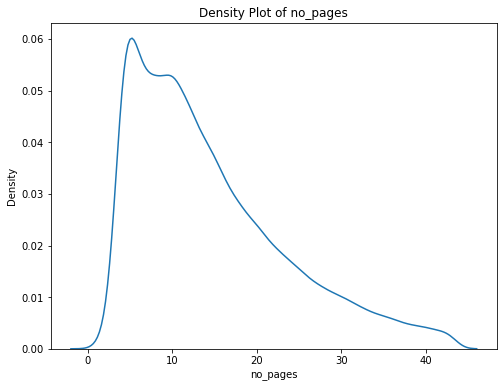

In [110]:
column_to_plot = 'no_pages'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create density plot for the column
sns.kdeplot(data=df_trimmed, x=column_to_plot, bw_adjust = 1.5)

# Set labels and title
ax.set_xlabel(column_to_plot)
ax.set_ylabel('Density')
ax.set_title(f'Density Plot of {column_to_plot}')

# Show the plot
plt.show()

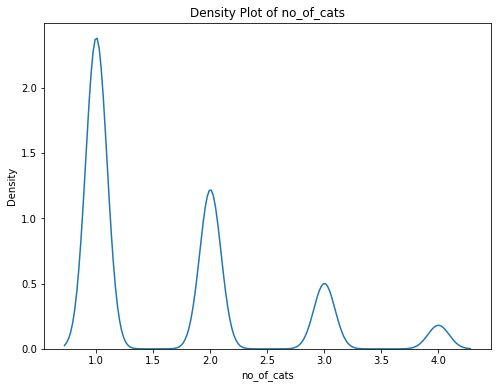

In [111]:
column_to_plot = 'no_of_cats'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create density plot for the column
sns.kdeplot(data=df_trimmed, x=column_to_plot, bw_adjust = 1.5)

# Set labels and title
ax.set_xlabel(column_to_plot)
ax.set_ylabel('Density')
ax.set_title(f'Density Plot of {column_to_plot}')

# Show the plot
plt.show()

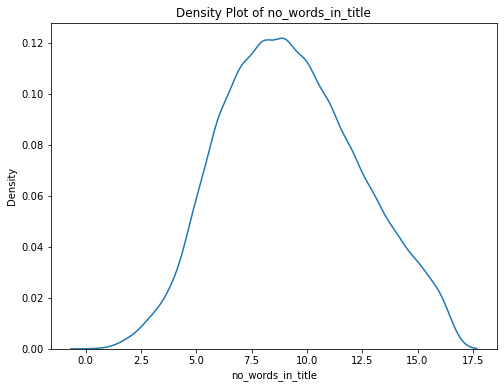

In [112]:
column_to_plot = 'no_words_in_title'

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create density plot for the column
sns.kdeplot(data=df_trimmed, x=column_to_plot, bw_adjust = 2.5)

# Set labels and title
ax.set_xlabel(column_to_plot)
ax.set_ylabel('Density')
ax.set_title(f'Density Plot of {column_to_plot}')

# Show the plot
plt.show()

In [113]:
df_encoded2 = df_trimmed.copy()
df_encoded2[['id', 'title', 'comments', 'journal-ref', 'categories']].describe()

,id,title,comments,journal-ref,categories
count,470546,470546,470546,470546,470546
unique,470546,470445,276380,470546,19886
top,704.0001,charm production at hera,"5 pages, 4 figures","Phys.Rev.D76:013009,2007",hep-ph
freq,1,2,3539,1,32102


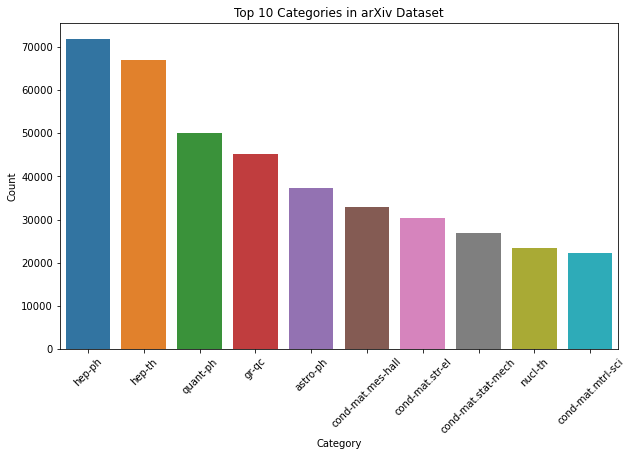

In [114]:
# Calculate the sum of each category across all rows
category_counts_encoded = df_encoded2.iloc[:, 8:-1].sum().sort_values(ascending=False).head(10)

# Create a bar plot of the 10 most common categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts_encoded.index, y=category_counts_encoded.values)
plt.title("Top 10 Categories in arXiv Dataset")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

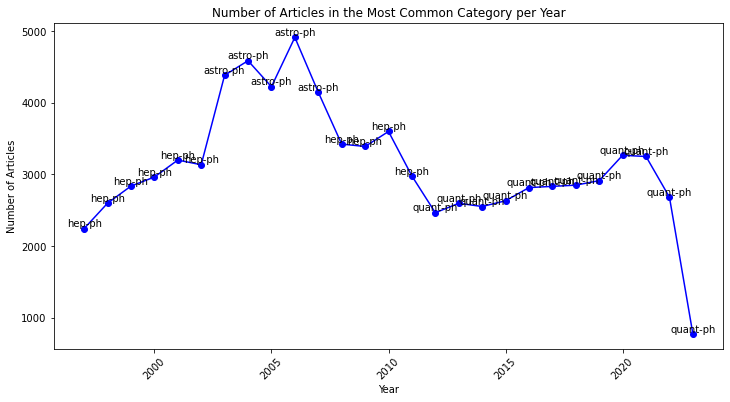

In [115]:
category_counts =  df_encoded2.loc[:, ['year_extracted'] + list(df_encoded2.columns[8:-1])].groupby('year_extracted').sum()

# Get the most common category for each year
most_common_categories = category_counts.idxmax(axis=1)

# Get the number of articles in the most common category for each year
category_article_counts = category_counts.max(axis=1)

# Plot the line graph for the number of articles
plt.figure(figsize=(12, 6))
plt.plot(category_article_counts.index, category_article_counts.values, color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles in the Most Common Category per Year')

# Add labels for the most common category at each point
for year, category in most_common_categories.items():
    count = category_article_counts[year]
    plt.text(year, count, category, ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


In [116]:
most_common_categories

year_extracted
1997      hep-ph
1998      hep-ph
1999      hep-ph
2000      hep-ph
2001      hep-ph
2002      hep-ph
2003    astro-ph
2004    astro-ph
2005    astro-ph
2006    astro-ph
2007    astro-ph
2008      hep-ph
2009      hep-ph
2010      hep-ph
2011      hep-ph
2012    quant-ph
2013    quant-ph
2014    quant-ph
2015    quant-ph
2016    quant-ph
2017    quant-ph
2018    quant-ph
2019    quant-ph
2020    quant-ph
2021    quant-ph
2022    quant-ph
2023    quant-ph
dtype: object

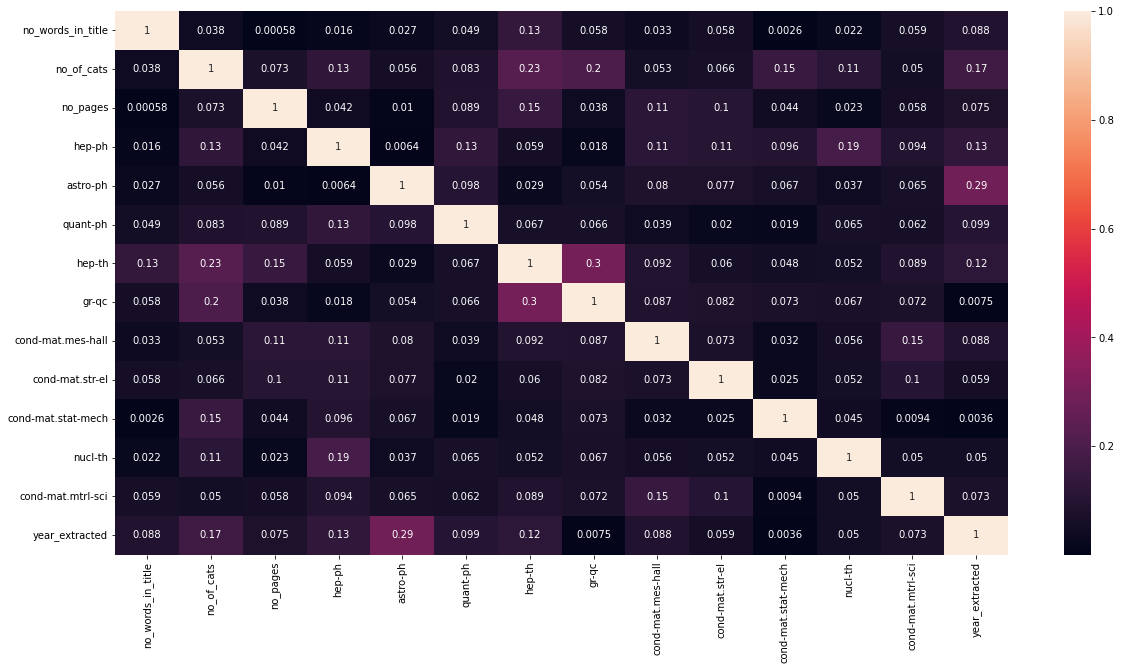

In [117]:
plt.figure(figsize = (20,10))
sns.heatmap(df_encoded2[['no_words_in_title', 'no_of_cats', 'no_pages', 'hep-ph', 'astro-ph', 'quant-ph', 'hep-th', 'gr-qc', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.stat-mech', 'nucl-th', 'cond-mat.mtrl-sci', 'year_extracted']].corr(method = 'pearson').abs(),annot = True);

In [118]:
import statsmodels.api as sm

X = df_encoded2[['no_words_in_title', 'no_of_cats', 'no_pages', 'hep-ph', 'astro-ph', 'quant-ph', 'hep-th', 'gr-qc', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.stat-mech', 'nucl-th', 'cond-mat.mtrl-sci']]
y = df_encoded2['year_extracted']

# Add a constant term to the X matrix for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

C:\Users\lewis\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:         year_extracted   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     8205.
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        15:24:38   Log-Likelihood:            -1.5385e+06
No. Observations:              470546   AIC:                         3.077e+06
Df Residuals:                  470532   BIC:                         3.077e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2007.0327      0

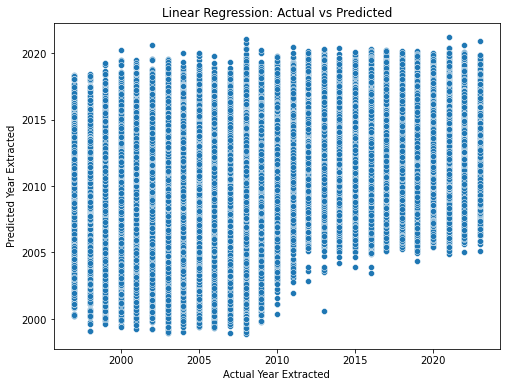

In [119]:
from sklearn.linear_model import LinearRegression

X = df_encoded2[['no_words_in_title', 'no_of_cats', 'no_pages', 'hep-ph', 'astro-ph', 'quant-ph', 'hep-th', 'gr-qc', 'cond-mat.mes-hall', 'cond-mat.str-el', 'cond-mat.stat-mech', 'nucl-th', 'cond-mat.mtrl-sci']]
y = df_encoded2['year_extracted']

# Fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Generate predicted values based on the fitted model
y_pred = reg_model.predict(X)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Actual Year Extracted')
plt.ylabel('Predicted Year Extracted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [121]:
# Get the max number of cats
max_categories = df_encoded2['no_of_cats'].max()

# Create column names
new_columns = [f'cat{i+1}' for i in range(max_categories)]

# Split 'categories', assign values to new columns
df_encoded2[new_columns] = df_encoded2['categories'].str.split(' ', expand=True)

display(df_encoded2)

,id,title,comments,journal-ref,categories,year_extracted,no_pages,no_words_in_title,acc-phys,adap-org,...,stat.ME,stat.ML,stat.OT,stat.TH,supr-con,no_of_cats,cat1,cat2,cat3,cat4
0,704.0001,calculation of prompt diphoton production cross sections at tevatron and lhc energies,"37 pages, 15 figures published version","Phys.Rev.D76:013009,2007",hep-ph,2007,37,12,0,0,...,0,0,0,0,0,1,hep-ph,<NA>,<NA>,<NA>
1,704.0007,polymer quantum mechanics and its continuum limit,"16 pages, no figures. typos corrected to match published version","Phys.Rev.D76:044016,2007",gr-qc,2007,16,7,0,0,...,0,0,0,0,0,1,gr-qc,<NA>,<NA>,<NA>
2,704.0015,fermionic superstring loop amplitudes in the pure spinor formalism,"22 pages signs and coefficients adjusted for anticommuting superfields, section 4.3 changed accordingly, reference added","JHEP 0705:034,2007",hep-th,2007,22,9,0,0,...,0,0,0,0,0,1,hep-th,<NA>,<NA>,<NA>
3,704.0016,lifetime of doubly charmed baryons,"17 pages, 3 figures and 1 table","Commun.Theor.Phys.49:993-1000,2008",hep-ph,2008,17,5,0,0,...,0,0,0,0,0,1,hep-ph,<NA>,<NA>,<NA>
4,704.0017,spectroscopic observations of the intermediate polar ex hydrae in quiescence,"10 pages, 11 figures figures 3, 4, 7 and 8 at reduced resolution, originals available on request. accepted for publication in monthly notices of the royal astronomical society","Mon.Not.Roy.Astron.Soc.378:211-220,2007",astro-ph,2007,10,10,0,0,...,0,0,0,0,0,1,astro-ph,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548396,supr-con/9608001,topology and phase transitions in the littleparks experiment,"latex, 26 pages, 5 figs upon request",SIAM J Appl Math {\bf 58} (1998) 103-121,supr-con cond-mat.supr-con quant-ph,1998,26,8,0,0,...,0,0,0,0,1,3,supr-con,cond-mat.supr-con,quant-ph,<NA>
548397,supr-con/9608003,extended bound states and resonances of two fermions on a periodic lattice,"21 pages, revtex, 4 postscript figures, arithmetic errors corrected. an abbreviated version no appendix appeared in prb on march 1, 1997","Phys. Rev. B 55, 6035 (1997)",supr-con cond-mat.supr-con,1997,21,12,0,0,...,0,0,0,0,1,2,supr-con,cond-mat.supr-con,<NA>,<NA>
548398,supr-con/9608004,ginzburglandaugorkov theory of magnetic oscillations in a typeii 2dimensional superconductor,"39 pages, 8 figures. this is a replacement of suprcon9608004. several sections changed or added, including a section on the effect of spin and the effect of a conserved number of particles. to be published in phys. rev. b",PHYS REV B 56: (2) 809-825 JUL 1 1997,supr-con cond-mat.supr-con,1997,39,10,0,0,...,0,0,0,0,1,2,supr-con,cond-mat.supr-con,<NA>,<NA>
548399,supr-con/9608005,evidence for quasiparticle decay in photoemission from underdoped cuprates,"4 pages of revtex, 3 eps figures","Phys. Rev. Lett. 79, 1726 (1997)",supr-con cond-mat.supr-con,1997,4,9,0,0,...,0,0,0,0,1,2,supr-con,cond-mat.supr-con,<NA>,<NA>


In [137]:
from scipy.stats import chi2_contingency

cross_tab = pd.crosstab(df_encoded2['journal-ref'], df_encoded2['cat1'])

chi2, p_value, _, _ = chi2_contingency(cross_tab)

print("P-value:", p_value)

P-value: 0.49464874339515424


In [144]:
from difflib import SequenceMatcher

def remove_special_characters(text):
    # Remove special characters outside of punctuation
    text = re.sub(r"[^\w\s,.?!\\]", "", text)
    return text

newdf = df_encoded2[['journal-ref', 'cat1']]

newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
newdf['journal-ref'] = newdf['journal-ref'] .str.replace('\n', ' ')
newdf['journal-ref'] = newdf['journal-ref'].str.replace('_', '')
newdf['journal-ref'] = newdf['journal-ref'].apply(remove_special_characters)

newdf['first_word'] = newdf['journal-ref'].str.extract(r'([\w]{3,})', expand=False).str.lower().astype('string')
newdf = newdf[newdf['first_word'].notnull()]
similarity_scores = []

for i, row in newdf.iterrows():
    journal_ref = row['first_word']
    cat1 = row['cat1']
    matcher = SequenceMatcher(None, journal_ref, cat1)
    similarity = matcher.ratio()
    similarity_scores.append(similarity)

newdf['similarity_score'] = similarity_scores

display(newdf.describe())


C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/607907747.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/607907747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/607907747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,similarity_score
count,462366.00
mean,0.24
std,0.19
min,0.00
25%,0.11
50%,0.20
75%,0.36
max,0.93


In [141]:
newdf = df_encoded2[['journal-ref', 'cat1']]

newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
newdf['journal-ref'] = newdf['journal-ref'] .str.replace('\n', ' ')
newdf['journal-ref'] = newdf['journal-ref'].str.replace('_', '')
newdf['journal-ref'] = newdf['journal-ref'].apply(remove_special_characters)
similarity_scores = []

for i, row in newdf.iterrows():
    journal_ref = row['journal-ref']
    cat1 = row['cat1']
    matcher = SequenceMatcher(None, journal_ref, cat1)
    similarity = matcher.ratio()
    similarity_scores.append(similarity)

newdf['similarity_score'] = similarity_scores

display(newdf.describe())


C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/323802521.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/323802521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['journal-ref'] = newdf['journal-ref'].str.replace('\d', '')
C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/323802521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,similarity_score
count,470546.00
mean,0.15
std,0.11
min,0.00
25%,0.07
50%,0.12
75%,0.21
max,0.67


In [142]:
newdf = df_encoded2[['journal-ref', 'cat1']]
similarity_scores = []

# Calculate similarity score using Levenshtein Distance
for i, row in newdf.iterrows():
    journal_ref = row['journal-ref']
    cat1 = row['cat1']
    similarity = fuzz.ratio(journal_ref, cat1)
    similarity_scores.append(similarity)

newdf['similarity_score'] = similarity_scores

display(newdf.describe())


C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/1980902926.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['similarity_score'] = similarity_scores


,similarity_score
count,470546.00
mean,10.49
std,7.41
min,0.00
25%,5.00
50%,9.00
75%,14.00
max,54.00


In [135]:
import nltk
from nltk.corpus import stopwords

# Obtaining the stop words from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a given text
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stop words from the 'title' column
df_encoded2['title'] = df_encoded2['title'].apply(remove_stopwords)
top_words = pd.Series(' '.join(df_encoded2['title']).lower().split()).value_counts()[:10]
print(top_words)

quantum     40981
model       24242
theory      17251
field       13493
spin        11994
magnetic    11934
systems     11907
phase       11369
states      11120
dynamics    10880
dtype: int64


In [149]:
# Compute the top 10 words used in the 'title' column
top_words = pd.Series(' '.join(df_encoded2['title']).lower().split()).value_counts()[:10]

# Iterate over the top words and recommend a journal for each word
for word in top_words.index:
    # Filter the DataFrame to include only rows with the current word in the title
    filtered_df = df_encoded2[df_encoded2['title'].str.contains(word, case=False)]

    # Compute the journal frequencies for the filtered DataFrame
    journal_frequencies = filtered_df['journal-ref'].value_counts()

    # Check if there are any journals with articles containing the word in the title
    if not journal_frequencies.empty:
        # Select the journal with the highest frequency
        top_journal = journal_frequencies.index[0]
        print(f"Recommended journal for '{word}': {top_journal}")
    else:
        print(f"No specific journal recommendation for '{word}'")


Recommended journal for 'quantum': Phys.Rev.D76:044016,2007
Recommended journal for 'model': Eur. Phys. J.-B, 22, 129-135 (2001)
Recommended journal for 'theory': J. Math. Kyoto Univ., 48 (2008), 857-893.
Recommended journal for 'field': Int.J.Mod.Phys.A23:3685-3705,2008
Recommended journal for 'spin': JHEP 0705:034,2007
Recommended journal for 'magnetic': Phys. Rev. B 75, 134405 (2007).
Recommended journal for 'systems': Class.Quant.Grav.24:S541-S550,2007
Recommended journal for 'phase': Phys.Lett.B658:7-12,2007
Recommended journal for 'states': PHYSICAL REVIEW A 75, 052106 (2007)
Recommended journal for 'dynamics': Phys. Rev. B 75, 174437 (2007)


In [180]:
df = df_encoded2.copy()
df['journal-ref'] = df['journal-ref'].str.replace('\d', '')
df['journal-ref'] = df['journal-ref'] .str.replace('\n', ' ')
df['journal-ref'] = df['journal-ref'].str.replace('_', '')
df['journal-ref'] = df['journal-ref'].str.replace('.', '')
df['journal-ref'] = df['journal-ref'].str.replace(',', '')
df['journal-ref'] = df['journal-ref'].apply(remove_special_characters)

# Iterate over the top words and recommend a journal for each word
for word in top_words.index:
    # Filter the DataFrame to include only rows with the current word in the title
    filtered_df = df[df['title'].str.contains(word, case=False)]

    # Compute the journal frequencies for the filtered DataFrame
    journal_frequencies = filtered_df['journal-ref'].value_counts()

    # Check if there are any journals with articles containing the word in the title
    if not journal_frequencies.empty:
        # Select the journal with the highest frequency
        top_journal = journal_frequencies.index[0]
        print(f"Recommended journal for '{word}': {top_journal}")
    else:
        print(f"No specific journal recommendation for '{word}'")


C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/4029642395.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['journal-ref'] = df['journal-ref'].str.replace('\d', '')
C:\Users\lewis\AppData\Local\Temp/ipykernel_13316/4029642395.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['journal-ref'] = df['journal-ref'].str.replace('.', '')


Recommended journal for 'quantum': Phys Rev A   
Recommended journal for 'model': Phys Rev B   
Recommended journal for 'theory': Phys Rev B   
Recommended journal for 'field': Phys Rev B   
Recommended journal for 'spin': Phys Rev B   
Recommended journal for 'magnetic': Phys Rev B   
Recommended journal for 'systems': Phys Rev B   
Recommended journal for 'phase': Phys Rev B   
Recommended journal for 'states': Phys Rev B   
Recommended journal for 'dynamics': Phys Rev B   
